In [2]:
import torch

#load a .pt file 
dataset = "./Datasets/VortexStreet_Re_200_default/density_karman_Re_200.pt"
data = torch.load(dataset, weights_only=True)

In [3]:
data.shape

torch.Size([1001, 1, 512, 256])

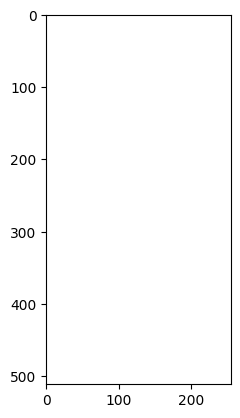

MovieWriter imagemagick unavailable; using Pillow instead.


In [4]:
#the first dimension is the number of samples
#plot a gif of the samples
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

fig = plt.figure()
ims = []
for i in range(data.shape[0]):
    im = plt.imshow(data[i,0,:,:].numpy(), animated=True)
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
#plt.show()
#plt.close()

ani.save('full_density_karman_Re_200.gif', writer='imagemagick', fps=10)

In [5]:
# save only the samples after step 350 from the dataset into a .pt file
data = data[350:]
torch.save(data, "./Datasets/VortexStreet_Re_200_default/density_karman_Re_200_after_step_350.pt")

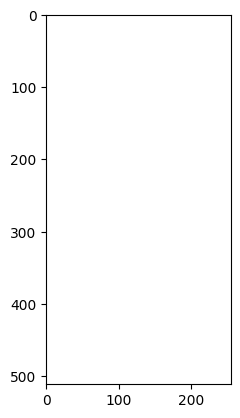

In [6]:
#visualize the samples after step 350
fig = plt.figure()
ims = []
for i in range(data.shape[0]):
    im = plt.imshow(data[i,0,:,:].numpy(), animated=True)
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
#plt.show()
#plt.close()


In [7]:
ani.save('cut_density_karman_Re_200.gif', writer='imagemagick', fps=10)

MovieWriter imagemagick unavailable; using Pillow instead.


In [8]:
#load the velocity field
vel_dataset = "./Datasets/VortexStreet_Re_200_default/velocity_karman_Re_200.pt"
vel_data = torch.load(vel_dataset, weights_only=True)


In [9]:
vel_mag = torch.linalg.norm(vel_data, ord=2, dim=1)
vel_mag.shape

torch.Size([1001, 512, 256])

MovieWriter imagemagick unavailable; using Pillow instead.


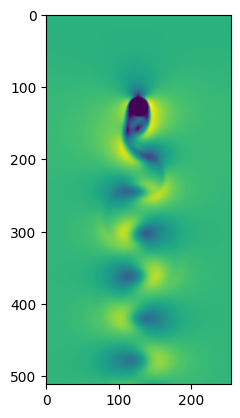

In [11]:
#save this dataset as a .gif file
fig = plt.figure()
ims = []
vel_mag = torch.linalg.norm(vel_data, ord=2, dim=1)
for i in range(vel_data.shape[0]):
    #save the velocity magnitude
    im = plt.imshow(vel_mag[i,:,:].numpy(), animated=True)
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
#plt.show()
#plt.close()
ani.save('full_velocity_karman_Re_200.gif', writer='imagemagick', fps=10)

In [12]:
# save only the samples after step 350 from the dataset into a .pt file
vel_data = vel_data[350:]
torch.save(vel_data, "./Datasets/VortexStreet_Re_200_default/velocity_karman_Re_200_after_step_350.pt")

MovieWriter imagemagick unavailable; using Pillow instead.


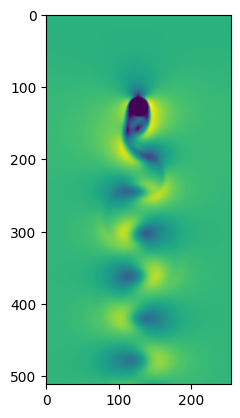

In [13]:
#visualize the samples after step 350
fig = plt.figure()
ims = []
vel_mag = torch.linalg.norm(vel_data, ord=2, dim=1)
for i in range(vel_data.shape[0]):
    #save the velocity magnitude
    im = plt.imshow(vel_mag[i,:,:].numpy(), animated=True)
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
#plt.show()
#plt.close()
ani.save('cut_velocity_karman_Re_200.gif', writer='imagemagick', fps=10)

In [18]:
#merge density and velocity fields

#load dataset
density_data = torch.load('./Datasets/VortexStreet_Re_200_default/density_karman_Re_200_after_step_350.pt', weights_only=True) 
velocity_data = torch.load('./Datasets/VortexStreet_Re_200_default/velocity_karman_Re_200_after_step_350.pt', weights_only=True) 

density_data.shape

torch.Size([651, 1, 512, 256])

In [19]:
#merge datasets
mixed_data = torch.cat((density_data, velocity_data), dim=1)
print("Shape of the mixed data: ", mixed_data.shape)

Shape of the mixed data:  torch.Size([651, 3, 512, 256])


In [20]:
torch.save(mixed_data, './Datasets/VortexStreet_Re_200_default/mixed_karman_Re_200_after_step_350.pt')